# Spam eMail detection - The ENRON email dataset - Naive Bayes 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
dataset=pd.read_csv(r"C:\Users\ABBIRAMY NELLAIKUMAR\OneDrive\Desktop\Abbi\Projects/Spam_Data.csv")

In [15]:
dataset.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [16]:
dataset.shape

(5572, 2)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
dataset.isnull().sum()

Category    0
Message     0
dtype: int64

In [19]:
dataset.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# DATA PREPROCESSING

In [20]:
dataset["Output"]= dataset["Category"].replace(to_replace=["ham","spam"], value= [0,1])

In [21]:
dataset.head()

,Category,Message,Output
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**Replacing null values

In [29]:
dataset1=(dataset.where((pd.notnull(dataset)),''))

,Message,Output
Category,,
ham,4825,4825
spam,747,747


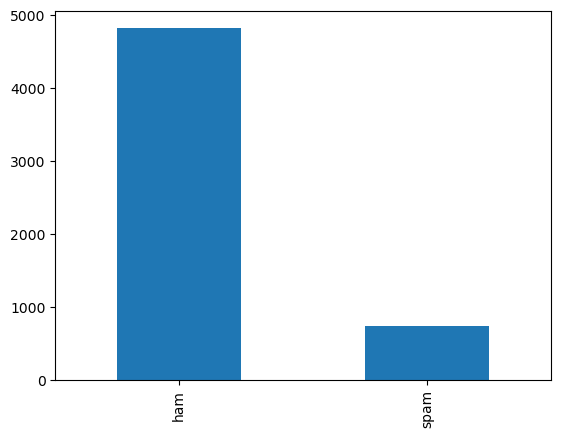

In [30]:
dataset1.Category.value_counts().plot.bar()
dataset1.groupby(['Category']).count()

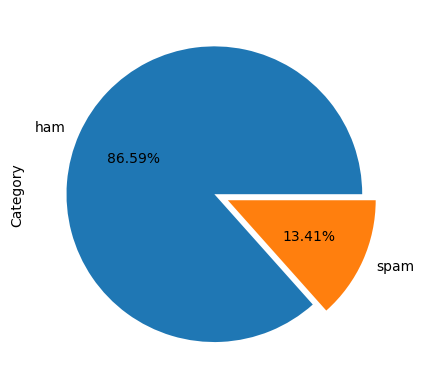

In [31]:
dataset1.Category.value_counts().plot.pie(autopct='%1.2f%%',radius=1,explode=[0,0.1]); 

In [32]:
X=dataset1['Message']
Y=dataset1['Category']

In [33]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [34]:
Y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

# Naive Bayes Model 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset1['Message'],dataset1['Output'], train_size =0.8)

In [39]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(5572,)
(4457,)
(1115,)


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[0].shape

(7817,)

In [41]:
from sklearn.naive_bayes import MultinomialNB
our_model= MultinomialNB()
our_model.fit(X_train_count, Y_train)

MultinomialNB()

# Model evaluation

In [46]:
test_email = [
    'You have won Jackpot of 200000!', 
    'Lucky draw customer! Enter bank details for credit', 
    'Hi friend! see you soon',
    'Iam blessed to have you in my life']
test_email_count = v.transform(test_email)

In [47]:
prediction =our_model.predict(test_email_count)
print(prediction)
for i in prediction:
    if i != 1:
        print('ham mail')
    else:
        print('spam mail')
        

[1 1 0 0]
spam mail
spam mail
ham mail
ham mail


In [49]:
X_train_count = v.transform(X_train)
Accuracy_on_train =our_model.score(X_train_count, Y_train)
print(f'Accuracy on train :{Accuracy_on_train * (100)}%')

Accuracy on train :99.37177473636976%


In [50]:
X_test_count = v.transform(X_test)
Accuracy_on_test =our_model.score(X_test_count, Y_test)
print(f'Accuracy on test :{Accuracy_on_test*(100)}%')

Accuracy on test :98.47533632286995%
